# Mount Drive with Colab

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Unzip the Directory

In [ ]:
def unzip_dir(parent_dir):
  # Loop through each folder in the parent directory
  for foldername in os.listdir(parent_dir):
    folderpath = os.path.join(parent_dir)

    # Check if the folder is a directory
    if os.path.isdir(folderpath):
      # Loop through each file in the folder
      for filename in os.listdir(parent_dir):
        filepath = os.path.join(parent_dir, filename)

      # Check if the file is a zip file
      if filename.endswith(".zip"):

        # Create a ZipFile object for the file
        with zipfile.ZipFile(filepath, "r") as zip_ref:
          # Extract all the files to the parent_dir
          zip_files=zip_ref.extractall(parent_dir)
          print(zip_files)
    else:
      print("No Dir")


In [ ]:
parent_dir = "/content/mydrive/MyDrive/NS-vehicle-anomaly-dataset-mega/ConstSpeed_0709/"

In [ ]:
# extract_zip_file=unzip_dir(parent_dir)
# print(extract_zip_file)

# Convert Dataset Json to CSV Format

In [ ]:
def read_json(json_directory):

    # Get a list of all the JSON files in the directory
    json_files = [f for f in os.listdir(json_directory) if f.endswith(".json")]

    # Initialize an empty list to store the dataframes
    dataframes = []

    # Loop through each JSON file and read it into a Pandas dataframe
    for json_file in json_files:
        # Construct the full path to the JSON file
        json_file_path = os.path.join(json_directory, json_file)

        # Read the JSON file into a dataframe
        dataframe = pd.read_json(json_file_path, lines=True)

        # Append the dataframe to the list of dataframes
        dataframes.append(dataframe)

    # Concatenate all the dataframes into a single dataframe
    merged_dataframe = pd.concat(dataframes, ignore_index=True)
    # Save the combine dataframe
    merged_dataframe.to_csv('/content/ConstSpeed_0709.csv')
    return merged_dataframe

In [ ]:
json_directory='/content/mydrive/MyDrive/NS-vehicle-anomaly-dataset-mega/ConstSpeed_0709/VeReMi_28800_32400_2022-9-11_20:46:34'
meraged_dataframe=read_json(json_directory)
print(meraged_dataframe)

# Preprocessing

### Combine ALL CSV Files Formate(14-Attackers)

In [ ]:
# set the directory where the CSV files are stored
directory = '/content/mydrive/MyDrive/CSV-files-14-Attacks/'

# create an empty list to store the dataframes
df_list = []

# loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # read the first 10000 rows from the CSV file into a dataframe
        df = pd.read_csv(os.path.join(directory, filename), nrows=10000)
        # append the dataframe to the list
        df_list.append(df)

# concatenate all the dataframes into a single dataframe
combined_df = pd.concat(df_list)
 # position column
combined_df['pos_0'] = combined_df['pos'].str.strip('[]').str.split(', ').str[0].astype(float)
combined_df['pos_1'] = combined_df['pos'].str.strip('[]').str.split(', ').str[1].astype(float)
combined_df['pos_2'] = combined_df['pos'].str.strip('[]').str.split(', ').str[2].astype(float)
combined_df.drop(columns=['pos'], inplace=True)


# speed column
combined_df['spd_0'] = combined_df['spd'].str.strip('[]').str.split(', ').str[0].astype(float)
combined_df['spd_1'] = combined_df['spd'].str.strip('[]').str.split(', ').str[1].astype(float)
combined_df['spd_2'] = combined_df['spd'].str.strip('[]').str.split(', ').str[2].astype(float)
combined_df.drop(columns=['spd'], inplace=True)

# print the first few rows of the combined dataframe
print(combined_df.head())

In [ ]:
combined_df.head()

In [ ]:
split the dataframe into pos , type , spd and attacks
combined_df=combined_df[['type', 'pos_0', 'pos_1', 'spd_0', 'spd_1', 'Attacks']]

In [ ]:
combine csv file
combined_df.to_csv('/content/train_dataset.csv')

# Load Dataset

In [ ]:
load dataset
df=pd.read_csv('/content/final_combine_train.csv')

In [ ]:
print(df)

In [ ]:
# shape
df.shape

In [ ]:
df=df.drop(columns=['Unnamed: 0'] , axis=1)

# Dataset Preprocessing

In [ ]:
# identify the null values
df.isnull().sum()

# Step 1- To Find the Type of Attacks(0-1)

# Load Training Dataset

In [ ]:
combined_df_type=pd.read_csv('/content/train_dataset.csv')
# combined_df_type=combined_df_type.drop(columns=['Unnamed: 0'] , axis=1)
print(combined_df_type.head(5))

   type       pos_0        pos_1     spd_0      spd_1   Attacks
0     0  143.932447  1022.904829  0.000000   0.000000  ConstPos
1     0  354.420706   641.637176 -2.108532  16.227503  ConstPos
2     0  153.586183   900.726664  0.000149   0.000149  ConstPos
3     0  928.797437  1091.099487  0.000020   0.000020  ConstPos
4     0  155.782562   771.833062 -1.968970  13.744119  ConstPos


# Scaling

In [ ]:
data1 = combined_df_type[['pos_0','pos_0','spd_0','spd_1']]

In [ ]:
from sklearn.preprocessing import StandardScaler
data1 = np.array(data1)
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1)

In [ ]:
x = scaled_data
y= combined_df_type['type']

# Feature Engineering

In [ ]:
combined_df_type['Attacks'].unique()

array(['ConstPos', 'ConstPosOffset', 'ConstSpeedOffset',
       'RandomSpeedOffset', 'RandomSpeed', 'RandomPosOffset', 'RandomPos',
       'GridSybil', 'Disruptive', 'DoS', 'EventualStop',
       'DelayedMessages', 'DataReplay', 'DoSDisruptiveSybil',
       'DoSDisruptive'], dtype=object)

In [ ]:
# Split the data into features (X) and target (y)
X = combined_df_type.drop(['type', 'Attacks'], axis=1)
y = combined_df_type['type']
# Split the data into training and test sets
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X, y, test_size=0.2)
print(X_train_type.shape)
print(X_test_type.shape)
print(y_train_type.shape)
print(y_test_type.shape)

(128000, 4)
(32000, 4)
(128000,)
(32000,)


# Test Case Shuffle Dataset- Type as a Target

In [ ]:
pred_df=combined_df_type
# Seperate the 0-non attacker and 1-attacker from original dataframe
pred_df_type_0=pred_df.loc[pred_df['type']==0]
pred_df_type_1=pred_df.loc[pred_df['type']==1]
# List
final_dataset=[]
# Non Attacker -0 slice into 20 rows
combine_pred_df_type_0=pred_df_type_0.loc[:20]
# append into the list
final_dataset.append(combine_pred_df_type_0)
pred_df_type_1=pred_df.loc[pred_df['type']==1]
pred_df_type_1=pred_df_type_1.reset_index(drop=True)
# Attacker-1 slice into 10 rows
combine_pred_df_type_1=pred_df_type_1.loc[:10]
# append into list
final_dataset.append(combine_pred_df_type_1)

In [ ]:
# concatinate the list
final_train_data=pd.concat(final_dataset)
# Drop the indexs
final_train_data=final_train_data.reset_index(drop=True)
# shuffle the dataframe random
shuffled_df = final_train_data.sample(frac = 1)
# reindexs the shuffle dataframe
shuffled_df = shuffled_df.reset_index()
# drop the index columns
shuffled_df = shuffled_df.drop('index', axis=1)

In [ ]:
df = pd.DataFrame(shuffled_df) # your original dataframe

# create list to hold the new dataframes
dfs = []
# loop through 6 times, each time increasing the number of rows
for i in range(1, 7):
    rows = i * 5 # calculate number of rows
    new_df = df.iloc[:rows]
     # slice the dataframe to get the desired number of rows
    dfs.append(new_df) # add the new dataframe to the list

# Training Machine Learning Models -Type as a Target

In [ ]:
def test_cases(model, dfs):
  model_accuracy = []
  final_times = []
  precision_scores=[]
  recall_scores=[]
  f1_scores=[]
  for test in dfs:
    # splitting features and target
    X = test.drop(['type', 'Attacks'], axis=1)
    # X = X.iloc[:, :3]
    # print(X)
    y = test['type']
    # start time
    start_time = time.time()
    #  prediction
    y_pred = model.predict(X)
    # end time
    end_time = time.time()
    accuracy = accuracy_score(y, y_pred)
    # precision tp / (tp + fp)
    precision= precision_score(y, y_pred)
    # print(precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y, y_pred)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y, y_pred)
    final_time = end_time - start_time
    model_accuracy.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    final_times.append(final_time)

  return model_accuracy, final_times , precision_scores , recall_scores , f1_scores

### Decision Tree Classification

In [ ]:
dcc= tree.DecisionTreeClassifier(max_depth=3, random_state=42)
dcc_model_step_1=dcc.fit(x,y)
y_pred_type = dcc_model_step_1.predict(x)
accuracy = accuracy_score(y, y_pred_type)
print("Accuracy:", accuracy)

Accuracy: 0.81113125


# Test Case- 1


> Accuracy of test case on  Five Test Messages




In [ ]:
mod_acc = test_cases(dcc_model_step_1, dfs)
# display in table
test_accuracy_step_1_1={ '5msg' : mod_acc[0][0] , '10msg' : mod_acc[0][1] , '15msg' : mod_acc[0][2], '20msg' : mod_acc[0][3] , '25msg' : mod_acc[0][4] , '30msg' : mod_acc[0][5]}
Time_time_step_1_1={ '5msg' : mod_acc[1][0] , '10msg' : mod_acc[1][1] , '15msg' : mod_acc[1][2], '20msg' : mod_acc[1][3] , '25msg' : mod_acc[1][4] , '30msg' : mod_acc[1][5]}
test_1_dataframe_step_1=pd.DataFrame([test_accuracy_step_1_1 , Time_time_step_1_1] , index=['DT' , 'Time'])
print(test_1_dataframe_step_1)

          5msg     10msg     15msg     20msg     25msg     30msg
DT    1.000000  0.800000  0.733333  0.600000  0.640000  0.666667
Time  0.003309  0.008604  0.002043  0.002053  0.002566  0.002444


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

### Compare Accuracy Vs Time

Text(0.5, 1.0, 'Prediction of DTC Vs Time')

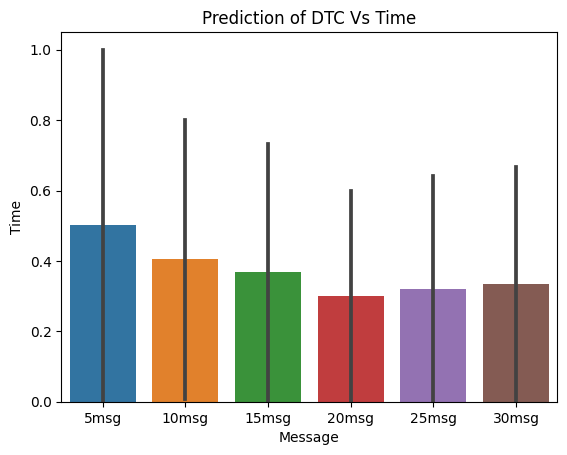

In [ ]:
sns.barplot(test_1_dataframe_step_1)
plt.xlabel('Message')
plt.ylabel('Time')
plt.title('Prediction of DTC Vs Time')

# Evaluation



> Recall , f1 and preciouse



In [ ]:
final_test_accuracy_step_1_1={ '5msg' : mod_acc[0][0] , '10msg' : mod_acc[0][1] , '15msg' : mod_acc[0][2], '20msg' : mod_acc[0][3] , '25msg' : mod_acc[0][4] , '30msg' : mod_acc[0][5]}
final_test_preciouse_step_1_1={ '5msg' : mod_acc[2][0] , '10msg' : mod_acc[2][1] , '15msg' : mod_acc[2][2], '20msg' : mod_acc[2][3] , '25msg' : mod_acc[2][4] , '30msg' : mod_acc[2][5]}
Final_Time_recall_step_1_1={ '5msg' : mod_acc[3][0] , '10msg' : mod_acc[3][1] , '15msg' : mod_acc[3][2], '20msg' : mod_acc[3][3] , '25msg' : mod_acc[3][4] , '30msg' : mod_acc[3][5]}
Final_Time_f1_step_1_1={ '5msg' : mod_acc[4][0] , '10msg' : mod_acc[4][1] , '15msg' : mod_acc[4][2], '20msg' : mod_acc[4][3] , '25msg' : mod_acc[4][4] , '30msg' : mod_acc[4][5]}
matrix_dataframe_1=pd.DataFrame([final_test_accuracy_step_1_1 , final_test_preciouse_step_1_1 ,Final_Time_recall_step_1_1 ,Final_Time_f1_step_1_1 ] , index=['Accuracy' , 'preciouse' , 'Recall' , 'F1'])
print(matrix_dataframe_1)

           5msg  10msg     15msg  20msg  25msg     30msg
Accuracy    1.0    0.8  0.733333    0.6   0.64  0.666667
preciouse   0.0    0.0  0.000000    0.0   0.00  0.000000
Recall      0.0    0.0  0.000000    0.0   0.00  0.000000
F1          0.0    0.0  0.000000    0.0   0.00  0.000000


### KNN Model

In [ ]:
neigh_STEP_1 = KNeighborsClassifier(n_neighbors=3)
neigh_STEP_1.fit(x , y)
y_pred = neigh_STEP_1.predict(x)
prob_acc = neigh_STEP_1.predict_proba(x)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95458125


# Test Case 2


In [ ]:
mod_acc = test_cases(neigh_STEP_1, dfs)
# display in table
test_accuracy_step_1_2={ '5msg' : mod_acc[0][0] , '10msg' : mod_acc[0][1] , '15msg' : mod_acc[0][2], '20msg' : mod_acc[0][3] , '25msg' : mod_acc[0][4] , '30msg' : mod_acc[0][5]}
Time_time_step_1_2={ '5msg' : mod_acc[1][0] , '10msg' : mod_acc[1][1] , '15msg' : mod_acc[1][2], '20msg' : mod_acc[1][3] , '25msg' : mod_acc[1][4] , '30msg' : mod_acc[1][5]}
test_2_dataframe_step_1=pd.DataFrame([test_accuracy_step_1_2 , Time_time_step_1_2] , index=['KNN' , 'Time'])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

         5msg     10msg     15msg     20msg     25msg     30msg
KNN   1.00000  0.800000  0.733333  0.600000  0.640000  0.666667
Time  0.00939  0.004935  0.004256  0.004433  0.004841  0.005098


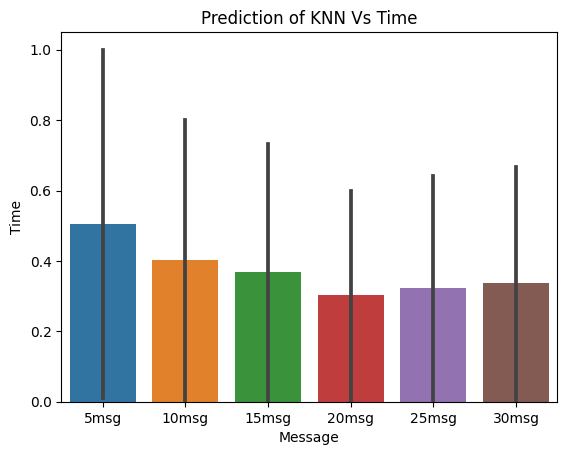

In [ ]:
sns.barplot(test_2_dataframe_step_1)
plt.xlabel('Message')
plt.ylabel('Time')
plt.title('Prediction of KNN Vs Time')
print(test_2_dataframe_step_1)

# Evaluation



> Recall , Preciouse and F1



In [ ]:
final_test_accuracy_step_1_2={ '5msg' : mod_acc[0][0] , '10msg' : mod_acc[0][1] , '15msg' : mod_acc[0][2], '20msg' : mod_acc[0][3] , '25msg' : mod_acc[0][4] , '30msg' : mod_acc[0][5]}
final_test_preciouse_step_1_2={ '5msg' : mod_acc[2][0] , '10msg' : mod_acc[2][1] , '15msg' : mod_acc[2][2], '20msg' : mod_acc[2][3] , '25msg' : mod_acc[2][4] , '30msg' : mod_acc[2][5]}
Final_Time_recall_step_1_2={ '5msg' : mod_acc[3][0] , '10msg' : mod_acc[3][1] , '15msg' : mod_acc[3][2], '20msg' : mod_acc[3][3] , '25msg' : mod_acc[3][4] , '30msg' : mod_acc[3][5]}
Final_Time_f1_step_1_2={ '5msg' : mod_acc[4][0] , '10msg' : mod_acc[4][1] , '15msg' : mod_acc[4][2], '20msg' : mod_acc[4][3] , '25msg' : mod_acc[4][4] , '30msg' : mod_acc[4][5]}
matrix_dataframe_2=pd.DataFrame([final_test_accuracy_step_1_2 , final_test_preciouse_step_1_2 ,Final_Time_recall_step_1_2 ,Final_Time_f1_step_1_2 ] , index=['Accuracy' , 'preciouse' , 'Recall' , 'F1'])
print(matrix_dataframe_2)

           5msg  10msg     15msg  20msg  25msg     30msg
Accuracy    1.0    0.8  0.733333    0.6   0.64  0.666667
preciouse   0.0    0.0  0.000000    0.0   0.00  0.000000
Recall      0.0    0.0  0.000000    0.0   0.00  0.000000
F1          0.0    0.0  0.000000    0.0   0.00  0.000000


### Random Forest Classifier

In [ ]:
rfc_step_1 = RandomForestClassifier()
rfc_step_1.fit(x, y)
y_pred = rfc_step_1.predict(x)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.99405


## Test Case -3

In [ ]:
mod_acc = test_cases(rfc_step_1, dfs)
# display in table
test_step_1_3={ '5msg' : mod_acc[0][0] , '10msg' : mod_acc[0][1] , '15msg' : mod_acc[0][2], '20msg' : mod_acc[0][3] , '25msg' : mod_acc[0][4] , '30msg' : mod_acc[0][5]}
Time_step_1_3={ '5msg' : mod_acc[1][0] , '10msg' : mod_acc[1][1] , '15msg' : mod_acc[1][2], '20msg' : mod_acc[1][3] , '25msg' : mod_acc[1][4] , '30msg' : mod_acc[1][5]}
test_3_dataframe_step_1=pd.DataFrame([test_step_1_3 , Time_step_1_3] , index=['RF' , 'Time'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

          5msg     10msg     15msg     20msg    25msg     30msg
RF    1.000000  0.800000  0.733333  0.600000  0.64000  0.666667
Time  0.020603  0.018672  0.016482  0.019613  0.01706  0.020379


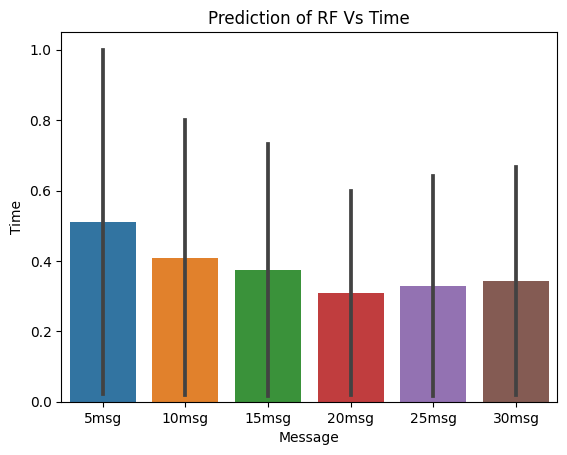

In [ ]:
sns.barplot(test_3_dataframe_step_1)
plt.xlabel('Message')
plt.ylabel('Time')
plt.title('Prediction of RF Vs Time')
print(test_3_dataframe_step_1)

# Evaluation



> Recall , preciouse and F1



In [ ]:
final_test_accuracy_step_1_3={ '5msg' : mod_acc[0][0] , '10msg' : mod_acc[0][1] , '15msg' : mod_acc[0][2], '20msg' : mod_acc[0][3] , '25msg' : mod_acc[0][4] , '30msg' : mod_acc[0][5]}
final_test_preciouse_step_1_3={ '5msg' : mod_acc[2][0] , '10msg' : mod_acc[2][1] , '15msg' : mod_acc[2][2], '20msg' : mod_acc[2][3] , '25msg' : mod_acc[2][4] , '30msg' : mod_acc[2][5]}
Final_Time_recall_step_1_3={ '5msg' : mod_acc[3][0] , '10msg' : mod_acc[3][1] , '15msg' : mod_acc[3][2], '20msg' : mod_acc[3][3] , '25msg' : mod_acc[3][4] , '30msg' : mod_acc[3][5]}
Final_Time_f1_step_1_3={ '5msg' : mod_acc[4][0] , '10msg' : mod_acc[4][1] , '15msg' : mod_acc[4][2], '20msg' : mod_acc[4][3] , '25msg' : mod_acc[4][4] , '30msg' : mod_acc[4][5]}
matrix_dataframe_3=pd.DataFrame([final_test_accuracy_step_1_3 , final_test_preciouse_step_1_3 ,Final_Time_recall_step_1_3 ,Final_Time_f1_step_1_3 ] , index=['Accuracy' , 'preciouse' , 'Recall' , 'F1'])
print(matrix_dataframe_3)

           5msg  10msg     15msg  20msg  25msg     30msg
Accuracy    1.0    0.8  0.733333    0.6   0.64  0.666667
preciouse   0.0    0.0  0.000000    0.0   0.00  0.000000
Recall      0.0    0.0  0.000000    0.0   0.00  0.000000
F1          0.0    0.0  0.000000    0.0   0.00  0.000000


# GRU

In [ ]:
# Reshape input data to have 3 dimensions
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Define the GRU model with the correct input shape
regressorGRU_step_1_1= Sequential()
regressorGRU_step_1_1.add(GRU(units=50, return_sequences=True, input_shape=(x.shape[1], x.shape[2]), activation='tanh'))
regressorGRU_step_1_1.add(Dropout(0.2))
regressorGRU_step_1_1.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU_step_1_1.add(Dropout(0.2))
regressorGRU_step_1_1.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU_step_1_1.add(Dropout(0.2))
regressorGRU_step_1_1.add(GRU(units=50, activation='tanh'))
regressorGRU_step_1_1.add(Dropout(0.2))
regressorGRU_step_1_1.add(Dense(units=1))
regressorGRU_step_1_1.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error', metrics=['accuracy'])
regressorGRU_step_1_1.fit(x, y, batch_size=150)
y_pred = regressorGRU_step_1_1.predict(x)

5000/5000 [==============================] - 22s 4ms/step


# Test Case 5

In [ ]:
def test_cases(model, dfs):
  model_accuracy = []
  final_times = []
  precision_scores=[]
  recall_scores=[]
  f1_scores=[]
  for test in dfs:
    # splitting features and target
    X = test.drop(['type', 'Attacks'], axis=1)
    y = test['type']
    # start time
    start_time = time.time()
    #  prediction
    y_pred = model.predict(X)
    y_pred=np.where(y_pred>0.5 , 0,1)

    # end time
    end_time = time.time()
    accuracy = accuracy_score(y, y_pred)
    # precision tp / (tp + fp)
    precision= precision_score(y, y_pred)
    # print(precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y, y_pred)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y, y_pred)
    final_time = end_time - start_time
    model_accuracy.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    final_times.append(final_time)

  return model_accuracy, final_times , precision_scores , recall_scores , f1_scores

1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 28ms/step
          5msg     10msg     15msg     20msg     25msg     30msg
GRU   0.000000  0.200000  0.266667  0.400000  0.360000  0.333333
Time  1.452459  0.074771  0.078068  0.081157  0.088626  0.081376


Text(0.5, 1.0, 'Prediction of GRU Vs Time')

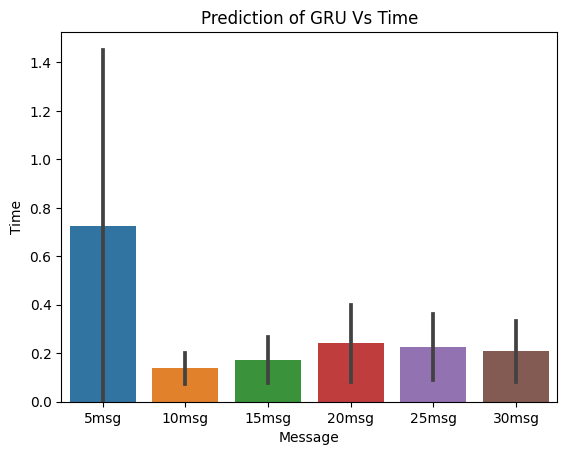

In [ ]:
mod_acc = test_cases(regressorGRU_step_1_1, dfs)
# display in table
test_step_1_4={ '5msg' : mod_acc[0][0] , '10msg' : mod_acc[0][1] , '15msg' : mod_acc[0][2], '20msg' : mod_acc[0][3] , '25msg' : mod_acc[0][4] , '30msg' : mod_acc[0][5]}
Time_step_1_4={ '5msg' : mod_acc[1][0] , '10msg' : mod_acc[1][1] , '15msg' : mod_acc[1][2], '20msg' : mod_acc[1][3] , '25msg' : mod_acc[1][4] , '30msg' : mod_acc[1][5]}
test_4_dataframe_step_1=pd.DataFrame([test_step_1_4 , Time_step_1_4] , index=['GRU' , 'Time'])
print(test_4_dataframe_step_1)
sns.barplot(test_4_dataframe_step_1)
plt.xlabel('Message')
plt.ylabel('Time')
plt.title('Prediction of GRU Vs Time')

In [ ]:
final_test_accuracy_step_1_4={ '5msg' : mod_acc[0][0] , '10msg' : mod_acc[0][1] , '15msg' : mod_acc[0][2], '20msg' : mod_acc[0][3] , '25msg' : mod_acc[0][4] , '30msg' : mod_acc[0][5]}
final_test_preciouse_step_1_4={ '5msg' : mod_acc[2][0] , '10msg' : mod_acc[2][1] , '15msg' : mod_acc[2][2], '20msg' : mod_acc[2][3] , '25msg' : mod_acc[2][4] , '30msg' : mod_acc[2][5]}
Final_Time_recall_step_1_4={ '5msg' : mod_acc[3][0] , '10msg' : mod_acc[3][1] , '15msg' : mod_acc[3][2], '20msg' : mod_acc[3][3] , '25msg' : mod_acc[3][4] , '30msg' : mod_acc[3][5]}
Final_Time_f1_step_1_4={ '5msg' : mod_acc[4][0] , '10msg' : mod_acc[4][1] , '15msg' : mod_acc[4][2], '20msg' : mod_acc[4][3] , '25msg' : mod_acc[4][4] , '30msg' : mod_acc[4][5]}
matrix_dataframe_4=pd.DataFrame([final_test_accuracy_step_1_4 , final_test_preciouse_step_1_4 ,Final_Time_recall_step_1_4 ,Final_Time_f1_step_1_4 ] , index=['Accuracy' , 'preciouse' , 'Recall' , 'F1'])
print(matrix_dataframe_4)

           5msg     10msg     15msg     20msg     25msg     30msg
Accuracy    0.0  0.200000  0.266667  0.400000  0.360000  0.333333
preciouse   0.0  0.200000  0.266667  0.400000  0.360000  0.333333
Recall      0.0  1.000000  1.000000  1.000000  1.000000  1.000000
F1          0.0  0.333333  0.421053  0.571429  0.529412  0.500000


# LSTM

In [ ]:
# # convert dataframes to numpy arrays
# X_train = np.array(X_train_type)
# y_train = np.array(y_train_type)
# X_test = np.array(X_test_type)
# y_test = np.array(y_test_type)

# # reshape input data
# X_train = X_train.reshape((x[0], x[1], 1))
# X_test = X_test.reshape((x.shape[0], x.shape[1], 1))
# define the model
LSTM_model_step_1 = Sequential()
LSTM_model_step_1.add(LSTM(50, input_shape=(x.shape[1], x.shape[2])))
LSTM_model_step_1.add(Dense(1))
# compile the model
LSTM_model_step_1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# fit the model
LSTM_model_step_1.fit(x, y, epochs=100, batch_size=32, verbose=0)

# evaluate the model
mse = LSTM_model_step_1.evaluate(x, y, verbose=0)
score_step_1 = LSTM_model_step_1.evaluate(x, y, batch_size = 32)

5000/5000 [==============================] - 11s 2ms/step - loss: 0.1249 - accuracy: 0.8390


# Test Case 5

In [ ]:
mod_acc = test_cases(LSTM_model_step_1, dfs)
# display in table
test_step_1_5={ '5msg' : mod_acc[0][0] , '10msg' : mod_acc[0][1] , '15msg' : mod_acc[0][2], '20msg' : mod_acc[0][3] , '25msg' : mod_acc[0][4] , '30msg' : mod_acc[0][5]}
Time_step_1_5={ '5msg' : mod_acc[1][0] , '10msg' : mod_acc[1][1] , '15msg' : mod_acc[1][2], '20msg' : mod_acc[1][3] , '25msg' : mod_acc[1][4] , '30msg' : mod_acc[1][5]}
test_5_dataframe_step_1=pd.DataFrame([test_step_1_5 , Time_step_1_5] , index=['lstm' , 'Time'])

1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 23ms/step


In [ ]:
mod_acc

([0.0, 0.2, 0.26666666666666666, 0.4, 0.36, 0.3333333333333333],
 [0.4949917793273926,
  0.06988692283630371,
  0.07239747047424316,
  0.07091951370239258,
  0.07144808769226074,
  0.08074307441711426],
 [0.0, 0.2, 0.26666666666666666, 0.4, 0.36, 0.3333333333333333],
 [0.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.0,
  0.33333333333333337,
  0.4210526315789474,
  0.5714285714285715,
  0.5294117647058824,
  0.5])

          5msg     10msg     15msg     20msg     25msg     30msg
GRU   0.000000  0.200000  0.266667  0.400000  0.360000  0.333333
Time  1.452459  0.074771  0.078068  0.081157  0.088626  0.081376


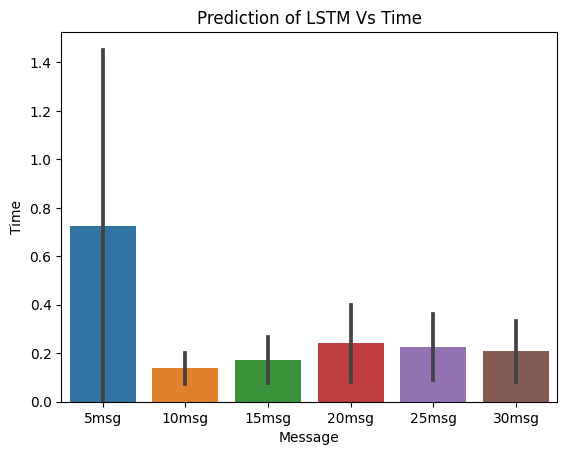

In [ ]:
sns.barplot(test_4_dataframe_step_1)
plt.xlabel('Message')
plt.ylabel('Time')
plt.title('Prediction of LSTM Vs Time')
print(test_4_dataframe_step_1)



> Recall . Preciouse and F1



In [ ]:
final_test_accuracy_step_1_5={ '5msg' : mod_acc[0][0] , '10msg' : mod_acc[0][1] , '15msg' : mod_acc[0][2], '20msg' : mod_acc[0][3] , '25msg' : mod_acc[0][4] , '30msg' : mod_acc[0][5]}
final_test_preciouse_step_1_5={ '5msg' : mod_acc[2][0] ,'10msg' : mod_acc[2][1], '15msg' : mod_acc[2][2], '20msg' : mod_acc[2][3] , '25msg' : mod_acc[2][4] , '30msg' : mod_acc[2][5]}
Final_Time_recall_step_1_5={ '5msg' : mod_acc[3][0] , '10msg' : mod_acc[3][1] , '15msg' : mod_acc[3][2], '20msg' : mod_acc[3][3] , '25msg' : mod_acc[3][4] , '30msg' : mod_acc[3][5]}
Final_Time_f1_step_1_5={ '5msg' : mod_acc[4][0] , '10msg' : mod_acc[4][1] , '15msg' : mod_acc[4][2], '20msg' : mod_acc[4][3] , '25msg' : mod_acc[4][4] , '30msg' : mod_acc[4][5]}
matrix_dataframe_5=pd.DataFrame([final_test_accuracy_step_1_5 , final_test_preciouse_step_1_5 ,Final_Time_recall_step_1_5 ,Final_Time_f1_step_1_5 ] , index=['Accuracy' , 'preciouse' , 'Recall' , 'F1'])
print(matrix_dataframe_5)

           5msg     10msg     15msg     20msg     25msg     30msg
Accuracy    0.0  0.200000  0.266667  0.400000  0.360000  0.333333
preciouse   0.0  0.200000  0.266667  0.400000  0.360000  0.333333
Recall      0.0  1.000000  1.000000  1.000000  1.000000  1.000000
F1          0.0  0.333333  0.421053  0.571429  0.529412  0.500000


# Step 2 - Attacker as a Tareget Varaiable

### Load Dataset

In [ ]:
combined_df_attacks=pd.read_csv('/content/train_dataset.csv')
print(combined_df_attacks)

        type       pos_0        pos_1      spd_0      spd_1        Attacks
0          0  143.932447  1022.904829   0.000000   0.000000       ConstPos
1          0  354.420706   641.637176  -2.108532  16.227503       ConstPos
2          0  153.586183   900.726664   0.000149   0.000149       ConstPos
3          0  928.797437  1091.099487   0.000020   0.000020       ConstPos
4          0  155.782562   771.833062  -1.968970  13.744119       ConstPos
...      ...         ...          ...        ...        ...            ...
159995     1  132.119616   889.446690   0.000505   0.000505  DoSDisruptive
159996     1  510.372108   860.120894   8.855281   8.277780  DoSDisruptive
159997     1  630.371460   420.831258  14.423676   5.560019  DoSDisruptive
159998     1  800.305077   791.123899  12.422521  -3.610628  DoSDisruptive
159999     1  838.941172   742.790481  11.638469  -9.348271  DoSDisruptive

[160000 rows x 6 columns]


In [ ]:
le=preprocessing.LabelEncoder()
combined_df_attacks['Attacks']=le.fit_transform(combined_df_attacks['Attacks'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the data into features (X) and target (y)
X_attacks = combined_df_attacks.drop(['type', 'Attacks'], axis=1)
X_attacks = np.array(X_attacks)
scaler = StandardScaler()
X_attacks = scaler.fit_transform(X_attacks[:, 1:])
y_attacks = combined_df_attacks['Attacks']
# Split the data into training and test sets
X_train_attacks, X_test_attacks, y_train_attacks, y_test_attacks = train_test_split(X_attacks, y_attacks, test_size=0.2)
print(X_train_attacks.shape)
print(X_test_attacks.shape)
print(y_train_attacks.shape)
print(y_test_attacks.shape)

(128000, 3)
(32000, 3)
(128000,)
(32000,)


# Shuffle Dataset

In [ ]:
shuffled_df_attacks = pd.concat([pd.DataFrame(X_attacks), y_attacks], ignore_index=True,axis=1).sample(frac = 1)
shuffled_df_attacks = shuffled_df_attacks.reset_index()
final_shuffled_df_attacks = shuffled_df_attacks.drop('index', axis=1)
final_shuffled_df_attacks

In [ ]:
df = pd.DataFrame(final_shuffled_df_attacks)
print(df)

In [ ]:
df.shape

(160000, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
data1 = np.array(data1)
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1[:,1:])

In [ ]:
df1=[]
for i in range(df.shape[0]):
    x= df.iloc[i]
    x = np.array(x).reshape(1, -1)
    pred =  dcc_model_step_1.predict(x)
    if(pred):
        df1.append(df.iloc[i])

In [ ]:
df1 = pd.DataFrame(df1)
print(df1)

               0         1         2    3
333    -0.961210  0.316249 -1.734855  0.0
857    -1.549705  0.282044 -1.741581  0.0
1667   -1.282861  0.302483 -1.866210  1.0
1793   -1.757853  0.338750 -1.906184  1.0
1794   -1.472440  0.274627 -1.695795  1.0
...          ...       ...       ...  ...
157410 -1.020863  0.302024 -1.863376  1.0
157602 -1.963472  0.209290 -1.882407  1.0
159620 -1.771901  0.314071 -1.777543  1.0
159741 -1.452171  0.297856 -1.837993  1.0
159975 -1.147317  0.322732 -2.012865  1.0

[287 rows x 4 columns]


In [ ]:
# dfs_attacks=[]
# import time
# df = pd.DataFrame(final_shuffled_df_attacks) # your original dataframe

# create list to hold the new dataframes


dfs_attacks=[]
# loop through 6 times, each time increasing the number of rows
for i in range(25, 55,5):
    # rows = i * 5 # calculate number of rows
    # print( df1.iloc[:rows])
    # print(i)
    # new_df = df1.iloc[:rows]
    #  # slice the dataframe to get the desired number of rows
    dfs_attacks.append(df1.iloc[:i]) # add the new dataframe to the list

# Test Case step 2

In [ ]:
def test_cases(model_step_1, model_step_2, dfs):
    model_accuracy = []
    Final_time=[]
    precision_scores=[]
    recall_scores=[]
    f1_scores=[]
    for test in dfs:
        # splitting features and target
        X = test.drop(columns=[3], axis=1)
        y_attacks = test[3]

        #    print(X.iloc[[row]])
        start_time=time.time()
        y_pred_step_2 = model_step_2.predict(X)
        End_time=time.time()
        accuracy = accuracy_score(y_attacks, y_pred_step_2)
        # precision tp / (tp + fp)
        precision= precision_score(y, y_pred)
        # print(precision)
        # recall: tp / (tp + fn)
        recall = recall_score(y, y_pred)
        # f1: 2 tp / (2 tp + fp + fn)
        f1 = f1_score(y, y_pred)
        final_time=End_time-start_time



            #    print(model_accuracy)
        Final_time.append(final_time)
        model_accuracy.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        return model_accuracy, Final_time , precision_scores , recall_scores , f1_scores

In [ ]:
dtc_step_2_1= tree.DecisionTreeClassifier()
dcc_model_step_2_1=dtc_step_2_1.fit(X_train_attacks , y_train_attacks)
y_pred = dcc_model_step_2_1.predict(X_test_attacks)
accuracy = accuracy_score(y_test_attacks, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.73125


In [ ]:
accuracy_model=test_cases(dcc_model_step_1 , dcc_model_step_2_1 , dfs_attacks)

ValueError: ignored

In [ ]:
accuracy_model

In [ ]:
# display in table
final_test_step_1_5={ '25msg' : accuracy_model[0][0] , '30msg' : accuracy_model[0][1] , '35msg' : accuracy_model[0][2], '40msg' : accuracy_model[0][3] , '45msg' : accuracy_model[0][4] , '50msg' : accuracy_model[0][5]}
Final_Time_step_1_5={ '25msg' : accuracy_model[1][0] , '30msg' : accuracy_model[1][1] , '35msg' : accuracy_model[1][2], '40msg' : accuracy_model[1][3] , '45msg' : accuracy_model[1][4] , '50msg' : accuracy_model[1][5]}
test_1_dataframe_step_2=pd.DataFrame([final_test_step_1_5 , Final_Time_step_1_5] , index=['DT' , 'Time'])
print(test_1_dataframe_step_2)

# KNN Model

In [ ]:
# create a KNeighborsClassifier model with 5 neighbors
knn_step_2 = KNeighborsClassifier(n_neighbors=5)

# fit the model to the training data
neigh_STEP_2=knn_step_2.fit(X_train_attacks, y_train_attacks)
# make predictions on the test data and compute accuracy
y_pred = neigh_STEP_2.predict(X_test_attacks)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
df1=[]
for i in range(df.shape[0]):
    x= df.iloc[i].drop(3)
    x[3] = 0  # Add a default value of 0 for the missing feature
    x = np.array(x).reshape(1, -1)
    pred =  neigh_STEP_1.predict(x)
    if(pred):
        df1.append(df.iloc[i])

In [ ]:
accuracy_model=test_cases(neigh_STEP_1 , neigh_STEP_2 , dfs_attacks)

In [ ]:
accuracy_model

In [ ]:
# display in table
final_test_step_2_2={ '5msg' : accuracy_model[0][0] , '10msg' : accuracy_model[0][1] , '15msg' : accuracy_model[0][2], '20msg' : accuracy_model[0][3] , '25msg' : accuracy_model[0][4] , '30msg' : accuracy_model[0][5]}
Final_Time_step_2_2={ '5msg' : accuracy_model[1][0] , '10msg' : accuracy_model[1][1] , '15msg' : accuracy_model[1][2], '20msg' : accuracy_model[1][3] , '25msg' : accuracy_model[1][4] , '30msg' : accuracy_model[1][5]}
test_1_dataframe_step_2=pd.DataFrame([final_test_step_2_2 , Final_Time_step_2_2] , index=['KNN' , 'Time'])
print(test_1_dataframe_step_2)
sns.barplot(test_1_dataframe_step_2)
plt.xlabel('Message')
plt.ylabel('Time')
plt.title('Compare Time Vs Accuracy for KNN')

# Random Forest

In [ ]:
rfc_step_2 = RandomForestClassifier()
rfc_step_2.fit(X_train_attacks, y_train_attacks)
y_pred = rfc_step_2.predict(X_test_attacks)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
df1=[]
for i in range(df.shape[0]):
    x= df.iloc[i].drop(3)
    x[3] = 0  # Add a default value of 0 for the missing feature
    x = np.array(x).reshape(1, -1)
    pred =  rfc_step_1.predict(x)
    if(pred):
        df1.append(df.iloc[i])

In [ ]:
accuracy_model=test_cases(rfc_step_1 , rfc_step_2 , dfs_attacks)

In [ ]:
accuracy_model

In [ ]:
# display in table
final_test_step_2_3={ '5msg' : accuracy_model[0][0] , '10msg' : accuracy_model[0][1] , '15msg' : accuracy_model[0][2], '20msg' : accuracy_model[0][3] , '25msg' : accuracy_model[0][4] , '30msg' : accuracy_model[0][5]}
Final_Time_step_2_3={ '5msg' : accuracy_model[1][0] , '10msg' : accuracy_model[1][1] , '15msg' : accuracy_model[1][2], '20msg' : accuracy_model[1][3] , '25msg' : accuracy_model[1][4] , '30msg' : accuracy_model[1][5]}
test_1_dataframe_step_2=pd.DataFrame([final_test_step_2_3 , Final_Time_step_2_3] , index=['RF' , 'Time'])
print(test_1_dataframe_step_2)
sns.barplot(test_1_dataframe_step_2)
plt.xlabel('Message')
plt.ylabel('Time')
plt.title('Compare Time Vs Accuracy for Random Forest')

# LSTM

In [ ]:
# convert dataframes to numpy arrays
X_train = np.array(X_train_attacks)
y_train = np.array(y_train_attacks)
X_test = np.array(X_test_attacks)
y_test = np.array(y_test_attacks)

# reshape input data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# encode the labels as integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# one-hot encode the labels
y_train = to_categorical(y_train, num_classes=15)
y_test = to_categorical(y_test, num_classes=15)
# define the model architecture
LSTM_model_step_2 = Sequential()
LSTM_model_step_2.add(LSTM(units=32, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model_step_2.add(Dense(15, activation='softmax'))


# Compile the model
LSTM_model_step_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
LSTM_model_step_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = LSTM_model_step_2.evaluate(X_test, y_test, batch_size=32)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

In [ ]:
df1=[]
for i in range(df.shape[0]):
    x= df.iloc[i].drop(3)
    x[3] = 0  # Add a default value of 0 for the missing feature
    x = np.array(x).reshape(1, -1)
    pred =  LSTM_model_step_1.predict(x)
    if(pred):
        df1.append(df.iloc[i])

In [ ]:
accuracy_model=test_cases(LSTM_model_step_1 , LSTM_model_step_2 , dfs_attacks)

In [ ]:
# display in table
final_test_step_2_4={ '5msg' : accuracy_model[0][0] , '10msg' : accuracy_model[0][1] , '15msg' : accuracy_model[0][2], '20msg' : accuracy_model[0][3] , '25msg' : accuracy_model[0][4] , '30msg' : accuracy_model[0][5]}
Final_Time_step_2_4={ '5msg' : accuracy_model[1][0] , '10msg' : accuracy_model[1][1] , '15msg' : accuracy_model[1][2], '20msg' : accuracy_model[1][3] , '25msg' : accuracy_model[1][4] , '30msg' : accuracy_model[1][5]}
test_4_dataframe_step_2=pd.DataFrame([final_test_step_2_4 , Final_Time_step_2_4] , index=['LSTM' , 'Time'])
print(test_4_dataframe_step_2)
sns.barplot(test_4_dataframe_step_2)
plt.xlabel('Message')
plt.ylabel('Time')
plt.title('Compare Time Vs Accuracy for LSTM')

# GRU

In [ ]:
# The GRU architecture
regressorGRU_step_2 = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU_step_2.add(GRU(units=50, return_sequences=True, input_shape=(X_train_type.shape[1],1), activation='tanh'))
regressorGRU_step_2.add(Dropout(0.2))
# Second GRU layer
regressorGRU_step_2.add(GRU(units=50, return_sequences=True, input_shape=(X_train_type.shape[1],1), activation='tanh'))
regressorGRU_step_2.add(Dropout(0.2))
# Third GRU layer
regressorGRU_step_2.add(GRU(units=50, return_sequences=True, input_shape=(X_train_type.shape[1],1), activation='tanh'))
regressorGRU_step_2.add(Dropout(0.2))
regressorGRU_step_2.add(GRU(units=50, activation='tanh'))
regressorGRU_step_2.add(Dropout(0.2))
regressorGRU_step_2.add(Dense(units=1))
regressorGRU_step_2.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error' , metrics=['accuracy'])
regressorGRU_step_2.fit(X_train_type,y_train_type,batch_size=150)
y_pred=regressorGRU_step_2.predict(X_test_type)

In [ ]:
df1=[]
for i in range(df.shape[0]):
    x= df.iloc[i].drop(3)
    x[3] = 0  # Add a default value of 0 for the missing feature
    x = np.array(x).reshape(1, -1)
    pred =  regressorGRU_step_1.predict(x)
    if(pred):
        df1.append(df.iloc[i])

In [ ]:
accuracy_model=test_cases(regressorGRU_step_1 , regressorGRU_step_2 , dfs_attacks)

In [ ]:
# display in table
final_test_step_2_5={ '5msg' : accuracy_model[0][0] , '10msg' : accuracy_model[0][1] , '15msg' : accuracy_model[0][2], '20msg' : accuracy_model[0][3] , '25msg' : accuracy_model[0][4] , '30msg' : accuracy_model[0][5]}
Final_Time_step_2_5={ '5msg' : accuracy_model[1][0] , '10msg' : accuracy_model[1][1] , '15msg' : accuracy_model[1][2], '20msg' : accuracy_model[1][3] , '25msg' : accuracy_model[1][4] , '30msg' : accuracy_model[1][5]}
test_4_dataframe_step_2=pd.DataFrame([final_test_step_2_5 , Final_Time_step_2_5] , index=['GRU' , 'Time'])
print(test_5_dataframe_step_2)
sns.barplot(test_5_dataframe_step_2)
plt.xlabel('Message')
plt.ylabel('Time')
plt.title('Compare Time Vs Accuracy for GRU')

### Compare the  Best Accurcay Results Of Step-1 and Step -2

### Decsion Tree Classifier

In [ ]:
# Accuracy data for Decision Tree
dt_accuracy_step_1 = [0.8, 0.9, 0.933333, 0.9, 0.92, 0.9]

# Accuracy data for Random Forest
dt_accuracy_step_2 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# X-axis labels
x_labels = ['5msg', '10msg', '15msg', '20msg', '25msg', '30msg']

# Set the width of each bar
bar_width = 0.35

# Positions of the left bar-boundaries
left_positions = np.arange(len(x_labels))

# Create a figure
fig, ax = plt.subplots()

# Plot the bars for Decision Tree and Random Forest
dt_bars = ax.bar(left_positions, dt_accuracy_step_1, width=bar_width, label='Step_1')
rf_bars = ax.bar(left_positions + bar_width, dt_accuracy_step_2, width=bar_width, label='Step_2')

# Add labels, title, and legend to the plot
ax.set_xlabel('Message')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.set_xticks(left_positions + bar_width/2)
ax.set_xticklabels(x_labels)
ax.legend()

# Show the plot
plt.show()


### Random Forest Classifier

In [ ]:
# Accuracy data for Decision Tree
rf_accuracy_step_2 = [1.000000,	1.000000,	1.000000,	1.000000,	1.00000	,1.000000]

# Accuracy data for Random Forest
rf_accuracy_step_1 = [1.000000,	1.000000,	1.000000,	1.000000,	1.000000,	0.966667]

# X-axis labels
x_labels = ['5msg', '10msg', '15msg', '20msg', '25msg', '30msg']

# Set the width of each bar
bar_width = 0.35

# Positions of the left bar-boundaries
left_positions = np.arange(len(x_labels))

# Create a figure
fig, ax = plt.subplots()

# Plot the bars for Decision Tree and Random Forest
dt_bars = ax.bar(left_positions, rf_accuracy_step_1, width=bar_width, label='Step_1')
rf_bars = ax.bar(left_positions + bar_width, rf_accuracy_step_2, width=bar_width, label='Step_2')

# Add labels, title, and legend to the plot
ax.set_xlabel('Message')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.set_xticks(left_positions + bar_width/2)
ax.set_xticklabels(x_labels)
ax.legend()

# Show the plot
plt.show()

### GRU

### KNN

In [ ]:
# Accuracy data for Decision Tree
rf_accuracy_step_1 = [0.800000,0.900000	,0.933333,	0.900000,	0.92000	,0.866667]

# Accuracy data for Random Forest
rf_accuracy_step_2 = [1.000000,	1.000000,	1.000000,	1.000000,	1.000000,	1.000000]

# X-axis labels
x_labels = ['5msg', '10msg', '15msg', '20msg', '25msg', '30msg']

# Set the width of each bar
bar_width = 0.35

# Positions of the left bar-boundaries
left_positions = np.arange(len(x_labels))

# Create a figure
fig, ax = plt.subplots()

# Plot the bars for Decision Tree and Random Forest
dt_bars = ax.bar(left_positions, rf_accuracy_step_1, width=bar_width, label='Step_1')
rf_bars = ax.bar(left_positions + bar_width, rf_accuracy_step_2, width=bar_width, label='Step_2')

# Add labels, title, and legend to the plot
ax.set_xlabel('Message')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.set_xticks(left_positions + bar_width/2)
ax.set_xticklabels(x_labels)
ax.legend()

# Show the plot
plt.show()

# Conclution: <br>
Random Forest , Decision Tree Classifier and KNN model Performed better results on Step 1 and Step 2 Both